In [1]:
import scipy.stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls

9_11_edgelist.txt	gnm2.csv
amazon.graph.large.csv	gnp1.csv
amazon.graph.small.csv	gnp2.csv
articulation.py		power law.ipynb
articulations_out.csv	ProjectDescription.NetworkPropertiesSpark.pdf
centrality_out.csv	README.txt
centrality.py		stanford_graphs
dblp.graph.large.csv	stanford_graphs.zip
dblp.graph.small.csv	Untitled.ipynb
degree.py		youtube.graph.large.csv
gnm1.csv		youtube.graph.small.csv


In [3]:
filename = 'youtube.graph.small.csv'
df = pd.read_csv(filename)
df = df.drop(df.columns[0],axis=1)
x = np.array(df[df.columns[0]])
y = np.array(df[df.columns[1]])

Text(0, 0.5, 'count')

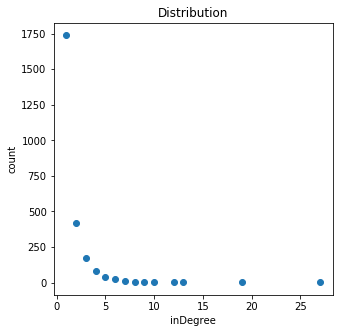

In [4]:
f, ax = plt.subplots(figsize=(5, 5))
#ax.set(xscale="log", yscale="log")
ax.scatter(x, y)

ax.set_title('Distribution')
ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])

Text(0, 0.5, 'count')

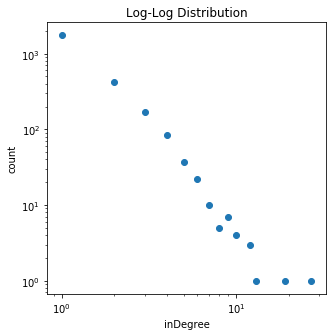

In [5]:
f, ax = plt.subplots(figsize=(5, 5))
ax.set(xscale="log", yscale="log")
ax.scatter(x, y)

ax.set_title('Log-Log Distribution')
ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])

Coefficients [-2.60472814  7.63227776]
Residuals [2.72996778]


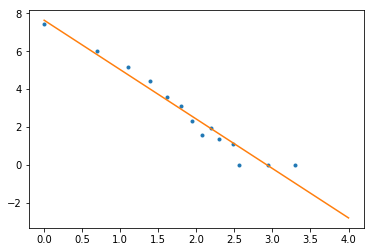

In [6]:
coefficients, residuals, _, _, _ = np.polyfit(np.log(x), np.log(y), 1, full=True)
print("Coefficients",coefficients)
print("Residuals",residuals)
polynomial = np.poly1d(coefficients)
xp = np.linspace(0, 4, 100)
plt.plot(np.log(x), np.log(y), '.', xp, polynomial(xp), '-')

In [7]:
params = scipy.stats.powerlaw.fit(np.log(y))
#Applying the Kolmogorov-Smirnof one sided test
D, p = scipy.stats.kstest(np.log(y), "powerlaw", args=params)
print("p-value: ",str(p),"D: ",str(D))

p-value:  0.8025036112397085 D:  0.17189536417102352


In [8]:
params = scipy.stats.powerlaw.fit(y)
#Applying the Kolmogorov-Smirnof one sided test
D, p = scipy.stats.kstest(y, "powerlaw", args=params)
print("p-value: ",str(p),"D: ",str(D))

p-value:  0.04647110203268088 D:  0.35235234905353413
